# Merge, join, and concatenate
`pandas` provides various facilities for easily combining together Series or
DataFrame with various kinds of set logic for the indexes
and relational algebra functionality in the case of join / merge-type
operations.

In this Notebook we will cover how you can **merge**, **join**, and **concatenate** your datasets, allowing you to unify and better understand your data as you analyze it.
- `merge()` is typically used for combining data on common columns or indices  
- `.join()` is used for combining data on a key column or an index  
- `concat()` is mostly used for combining DataFrames across rows or columns  

In addition, `pandas` also provides utilities to compare two Series or DataFrame
and summarize their differences (not covered in this Notebook but very straighforward, for more information click [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.compare.html#pandas.Series.compare) for Series and [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.compare.html#pandas.DataFrame.compare) for DataFrames).


`pandas` has full-featured, **high performance** in-memory join operations idiomatically very similar to relational databases like SQL. These methods perform significantly better (in some cases well over an order of magnitude better) than other open source implementations (like ``base::merge.data.frame`` in R). The reason for this is careful algorithmic design and the internal layout of the data in ``DataFrame``.

## Merging data using `pd.merge`

`merge()` has a SQL-like database join functionality and is the most flexible of the three operations that you’ll learn. `merge()` should be used if you want to combine data objects based on one or more keys. `merge()` is most useful when you want to combine rows that share data. It works with DataFrame or named Series objects.

You can achieve both **many-to-one** and **many-to-many** joins with `merge()` in addition to the straight-forward **one-to-one** join. In a many-to-one join, one of your datasets will have many rows in the merge column that repeat the same values. For example, the values could be 1, 1, 3, 5, and 5. At the same time, the merge column in the other dataset won’t have repeated values. Take 1, 3, and 5 as an example.

As you might have guessed, in a many-to-many join, both of your merge columns will have repeated values. These merges are more complex and result in the Cartesian product of the joined rows.

This means that, after the merge, you’ll have every combination of rows that share the same value in the key column. You’ll see this in action in the examples below.

`merge()` is very flexible with a vast number of options for defining the behavior of your merge. While the list can seem daunting, with practice you’ll be able to expertly merge datasets of all kinds.

When you use `pd.merge()`, two arguments are required:
1. The left DataFrame  
2. The right DataFrame  

The following optional arguments are most commonly used to define how the datasets are merged:

- `how` defines what kind of merge to make. It defaults to `'inner'`, but other possible options include `'outer'`, `'left'`, and `'right'`.  
- `on` tells `merge()` which "key" columns or indices you want to join on. This is optional. If it isn't specified, and `left_index` and `right_index` (covered below) are `False`, then columns from the two DataFrames that share names will be used as join keys. If you use on, then the column or index that you specify must be present in both objects.  
`left_on` and `right_on` specify a column or index that's present only in the left or right object that you're merging. Both default to `None`.  
- `left_index` and `right_index` both default to `False`, but if you want to use the index of the left or right object to be merged, then you can set the relevant argument to `True`.
- `suffixes` is a tuple of strings to append to identical column names that aren't merge keys. This allows you to keep track of the origins of columns with the same name.  


The return type will be the same as `left` object. If `left` is a `DataFrame` or named `Series` and `right` is a subclass of `DataFrame`, the return type will still be `DataFrame`.

**Note:** `merge` is a function in the `pandas` namespace, and it is also available as a `DataFrame` instance method `DataFrame.merge()`, with the calling `DataFrame` being implicitly considered the left object in the join.

**Note:** In general it is always a good idea to specify which column(s) to join on. This is the safest way to merge your data because you and anyone reading your code will know exactly what to expect when calling `merge()`. If you don’t specify the merge column(s) with on, then pandas will use any columns with the same name as the merge keys. However, tradeoff is that you are hard-coding columns indices, or worse, column names.

### How to use `pd.merge()`

In the image below, the two circles are two datasets and the labels point to which part or parts of the datasets you can expect to see (this is slightly simplified).

Except for `inner` all other operations are outer joins. With outer joins, the data is merged based on all the keys in the left object, the right object, or both. For keys that only exist in one object, unmatched columns in the other object will be filled in with `NaN`.

![joins_diagram.png](./images/join_diagram.png)


- **one-to-one** joins: for example when joining two ``DataFrame`` objects on their indexes (which must contain unique values).
- **many-to-one** joins: for example when joining an index (unique) to one or more columns in a different ``DataFrame``.
- **many-to-many** joins: joining columns on columns.

**Note:** When joining columns on columns (potentially a many-to-many join), any   indexes on the passed ``DataFrame`` objects **will be discarded**.

In [6]:
#Here is a very basic example with one unique key combination:
import pandas as pd
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)
pd.merge(left, right, on="key")

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


![merging_merge_on_key.png](./images/merging_merge_on_key.png)

In [7]:
# Here is a more complicated example with multiple join keys.
# Only the keys appearing in left and right are present (the intersection), since how='inner' by default.
left = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)
right = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

pd.merge(left, right, on=["key1", "key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


![merging_merge_on_key_multiple.png](./images/merging_merge_on_key_multiple.png)

### The `how` argument
The `how` argument to merge specifies how to determine which keys are to be included in the resulting table. If a key combination does not appear in either the left or right tables, the values in the joined table will be `NA`. Here is a summary of the how options and their SQL equivalent names:

|Merge method| SQL JOIN Name|Description|  
|:---|:---|:---|  
|`left`|`LEFT OUTER JOIN`|Use keys from left frame only|  
|`right`|`RIGHT OUTER JOIN`|Use keys from right frame only|  
|`outer`|`FULL OUTER JOIN`|Use union of keys from both frames|  
|`inner`|`INNER JOIN`|Use intersection of keys from both frames|  
|`cross`|`CROSS JOIN`|Create the cartesian product of rows of both frames|  

In [9]:
# Only using keys from left dataframe
pd.merge(left, right, how="left", on=["key1", "key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


![merging_merge_on_key_left.png](./images/merging_merge_on_key_left.png)

In [11]:
# Only using keys from the right dataframe
pd.merge(left, right, how="right", on=["key1", "key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


![merging_merge_on_key_right.png](./images/merging_merge_on_key_right.png)

In [14]:
# All keys from both dataframes
pd.merge(left, right, how="outer", on=["key1", "key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


![merging_merge_on_key_outer.png](./images/merging_merge_on_key_outer.png)

In [16]:
# Only using keys that exist in both dataframe
pd.merge(left, right, how="inner", on=["key1", "key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


![merging_merge_on_key_inner.png](./images/merging_merge_on_key_inner.png)

In [17]:
# Using all key combination from both dataframe (cartesian product)
pd.merge(left, right, how="cross")

,key1_x,key2_x,A,B,key1_y,key2_y,C,D
0,K0,K0,A0,B0,K0,K0,C0,D0
1,K0,K0,A0,B0,K1,K0,C1,D1
2,K0,K0,A0,B0,K1,K0,C2,D2
3,K0,K0,A0,B0,K2,K0,C3,D3
4,K0,K1,A1,B1,K0,K0,C0,D0
5,K0,K1,A1,B1,K1,K0,C1,D1
6,K0,K1,A1,B1,K1,K0,C2,D2
7,K0,K1,A1,B1,K2,K0,C3,D3
8,K1,K0,A2,B2,K0,K0,C0,D0
9,K1,K0,A2,B2,K1,K0,C1,D1


![merging_merge_cross.png](./images/merging_merge_cross.png)

### Dealing with duplicate keys
Be carefule about duplicate keys in the index columns. Merging on duplicate keys can cause a returned frame that is the multiplication of the row dimensions, which may result in memory overflow. Below depicts this situation:

In [19]:
left = pd.DataFrame({"A": [1, 2], "B": [2, 2]})
right = pd.DataFrame({"A": [4, 5, 6], "B": [2, 2, 2]})
pd.merge(left, right, on="B", how="outer")

,A_x,B,A_y
0,1,2,4
1,1,2,5
2,1,2,6
3,2,2,4
4,2,2,5
5,2,2,6


![merging_merge_on_key_dup.png](./images/merging_merge_on_key_dup.png)

We can use the `validate` argument to check whether there are unexpected duplicates in the merge keys. Key uniqueness is checked before merge operations and so should protect against memory overflows. Checking key uniqueness is also a good way to ensure that your data structures are as expected.

In this example, there are duplicate values of B in the right DataFrame, therefore an exception will be raised if we specify that the expected merge operation is a *one-to-one* merge.

In [22]:
left = pd.DataFrame({"A": [1, 2], "B": [1, 2]})
right = pd.DataFrame({"A": [4, 5, 6], "B": [2, 2, 2]})
pd.merge(left, right, on="B", how="outer", validate="one_to_one")

MergeError: Merge keys are not unique in right dataset; not a one-to-one merge

If the you know that duplicates exist in the right DataFrame but want to ensure there are no duplicates in the left DataFrame, you can use the `validate='one_to_many'` argument instead, which will not raise an exception:

In [23]:
pd.merge(left, right, on="B", how="outer", validate="one_to_many")

,A_x,B,A_y
0,1,1,NaN
1,2,2,4.0
2,2,2,5.0
3,2,2,6.0


## Joining on indices using `.join()`
While `pd.merge()` is a module function, `.join()` is an instance method that lives on your DataFrame. This enables you to specify only one DataFrame, which will join the DataFrame you call `.join()` on. Under the hood, `.join()` uses `merge()`, but it provides a more efficient way to join DataFrames than a fully specified `merge()` call.

### How to use `.join()`
By default, `.join()` will attempt to do a left join on indices. If you want to join on columns like you would with `merge()`, then you'll need to set the columns as indices. Like `merge()`, `.join()` has a few parameters that give you more flexibility in your joins. However, with `.join()`, the list of parameters is relatively short:

- `other` is the only required parameter. It defines the other DataFrame to join. You can also specify a list of DataFrames here, allowing you to combine a number of datasets in a single `.join()` call.  
- `on` specifies an optional column or index name for the left DataFrame to join the other DataFrame's index. If it is set to `None`, which is the default, then you'll get an index-on-index join.  
- `how` has the same options as how from `merge()`. The difference is that it's index-based unless you also specify columns with `on`.  
- `lsuffix` and `rsuffix` are similar to `suffixes` in `merge()`. They specify a suffix to add to any overlapping columns but have no effect when passing a list of other DataFrames.  
- `sort` can be enabled to sort the resulting DataFrame by the join key.

In [24]:
left = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=["K0", "K1", "K2"]
)


right = pd.DataFrame(
    {"C": ["C0", "C2", "C3"], "D": ["D0", "D2", "D3"]}, index=["K0", "K2", "K3"]
)
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


![merging_join.png](./images/merging_join.png)

Most of the other join operations are possible using `.join()` as long as the dataframes have indices (row labels). Indices can be interpreted as key columns that are used by `merge()` to join dataframes together. Let's use the example dataframes from the `merge()` section and see how to use `join()` to get the same results:

In [26]:
left = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)
right = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)
# Using inner merge on key columns key1 and key2
pd.merge(left, right, on=["key1", "key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


Because `.join()` works on indices, if you want to recreate `merge()` from before, then you must set indices on the join columns that you specify. In this example, you used `.set_index()` to set your indices to the key columns within the `join`. Note that `.join()` does a **left join by default** so you need to explictly use how to do an inner join.

In [27]:
left.join(
    right.set_index(["key1", "key2"]),
    on=["key1", "key2"],
    how="inner",
    lsuffix="_x",
    rsuffix="_y",
)

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
2,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


Often DataFrames have indices, therefore `join()` is frequently used as short-hand way to merge data sets together.

## Merging together values within Series or DataFrame columns
Another fairly common situation is to have two like-indexed (or similarly indexed) `Series` or `DataFrame` objects and wanting to "patch" values in one object from values for matching indices in the other. This can be achieved with the `combine_first()` method:

In [30]:
import numpy as np
df1 = pd.DataFrame(
    [[np.nan, 3.0, 5.0], [-4.6, np.nan, np.nan], [np.nan, 7.0, np.nan]]
)
df2 = pd.DataFrame([[-42.6, np.nan, -8.2], [-5.0, 1.6, 4]], index=[1, 2])
print(df1)
print(df2)
df1.combine_first(df2)

     0    1    2
0  NaN  3.0  5.0
1 -4.6  NaN  NaN
2  NaN  7.0  NaN
      0    1    2
1 -42.6  NaN -8.2
2  -5.0  1.6  4.0


,0,1,2
0,NaN,3.0,5.0
1,-4.6,NaN,-8.2
2,-5.0,7.0,4.0


Note that this method only takes values from the right DataFrame if they are missing in the left DataFrame. A related method, `update()`, alters non-NA values in place:

In [33]:
df1.update(df2)
df1

,0,1,2
0,NaN,3.0,5.0
1,-42.6,NaN,-8.2
2,-5.0,1.6,4.0


## Timeseries-friendly merging
### `merge_ordered()`
A merge_ordered() function allows combining time series and other ordered data. In particular it has an optional fill_method keyword to fill/interpolate missing data:

In [45]:
left = pd.DataFrame({
    "date": ['2007-02-01', '2007-03-01', '2007-04-01', '2007-05-01', '2007-06-01'],
    "close": [12.08, 13.27, 14.27, 17.31, 17.43],
    "country": ["Australia", "South Korea", "South Korea", "South Korea", "South Korea"]
})
right = pd.DataFrame({
    "date": ['2007-02-01', '2007-05-01', '2007-01-01', '2007-03-01', '2007-04-01'],
    "close": [44.34, 43.68, 45.04, 48.27, 50.54]
})
print(left)
print(right)
pd.merge_ordered(left, right, on='date', suffixes=('_df1', '_df2'), fill_method='ffill') # fill-forfward

         date  close      country
0  2007-02-01  12.08    Australia
1  2007-03-01  13.27  South Korea
2  2007-04-01  14.27  South Korea
3  2007-05-01  17.31  South Korea
4  2007-06-01  17.43  South Korea
         date  close
0  2007-02-01  44.34
1  2007-05-01  43.68
2  2007-01-01  45.04
3  2007-03-01  48.27
4  2007-04-01  50.54


,date,close_df1,country,close_df2
0,2007-01-01,NaN,NaN,45.04
1,2007-02-01,12.08,Australia,44.34
2,2007-03-01,13.27,South Korea,48.27
3,2007-04-01,14.27,South Korea,50.54
4,2007-05-01,17.31,South Korea,43.68
5,2007-06-01,17.43,South Korea,43.68


In [47]:
pd.merge_ordered(left, right, on='date', suffixes=('_df1', '_df2'), left_by="country") # fill-forfward

,date,close_df1,country,close_df2
0,2007-01-01,NaN,Australia,45.04
1,2007-02-01,12.08,Australia,44.34
2,2007-03-01,NaN,Australia,48.27
3,2007-04-01,NaN,Australia,50.54
4,2007-05-01,NaN,Australia,43.68
5,2007-01-01,NaN,South Korea,45.04
6,2007-02-01,NaN,South Korea,44.34
7,2007-03-01,13.27,South Korea,48.27
8,2007-04-01,14.27,South Korea,50.54
9,2007-05-01,17.31,South Korea,43.68


### `merge_asof()`
A `merge_asof()` is similar to an ordered left-join except that we match on nearest key rather than equal keys. For each row in the left DataFrame, we select the last row in the right DataFrame whose on key is less than the left's key. Both DataFrames must be sorted by the key.

Optionally an asof merge can perform a group-wise merge. This matches the by key equally, in addition to the nearest match on the on key.

For example, we might have trades and quotes and we want to asof merge them.

In [48]:
trades = pd.DataFrame(
    {
        "time": pd.to_datetime(
            [
                "20160525 13:30:00.023",
                "20160525 13:30:00.038",
                "20160525 13:30:00.048",
                "20160525 13:30:00.048",
                "20160525 13:30:00.048",
            ]
        ),
        "ticker": ["MSFT", "MSFT", "GOOG", "GOOG", "AAPL"],
        "price": [51.95, 51.95, 720.77, 720.92, 98.00],
        "quantity": [75, 155, 100, 100, 100],
    },
    columns=["time", "ticker", "price", "quantity"],
)


quotes = pd.DataFrame(
    {
        "time": pd.to_datetime(
            [
                "20160525 13:30:00.023",
                "20160525 13:30:00.023",
                "20160525 13:30:00.030",
                "20160525 13:30:00.041",
                "20160525 13:30:00.048",
                "20160525 13:30:00.049",
                "20160525 13:30:00.072",
                "20160525 13:30:00.075",
            ]
        ),
        "ticker": ["GOOG", "MSFT", "MSFT", "MSFT", "GOOG", "AAPL", "GOOG", "MSFT"],
        "bid": [720.50, 51.95, 51.97, 51.99, 720.50, 97.99, 720.50, 52.01],
        "ask": [720.93, 51.96, 51.98, 52.00, 720.93, 98.01, 720.88, 52.03],
    },
    columns=["time", "ticker", "bid", "ask"],
)
print(trades)
print(quotes)

                     time ticker   price  quantity
0 2016-05-25 13:30:00.023   MSFT   51.95        75
1 2016-05-25 13:30:00.038   MSFT   51.95       155
2 2016-05-25 13:30:00.048   GOOG  720.77       100
3 2016-05-25 13:30:00.048   GOOG  720.92       100
4 2016-05-25 13:30:00.048   AAPL   98.00       100
                     time ticker     bid     ask
0 2016-05-25 13:30:00.023   GOOG  720.50  720.93
1 2016-05-25 13:30:00.023   MSFT   51.95   51.96
2 2016-05-25 13:30:00.030   MSFT   51.97   51.98
3 2016-05-25 13:30:00.041   MSFT   51.99   52.00
4 2016-05-25 13:30:00.048   GOOG  720.50  720.93
5 2016-05-25 13:30:00.049   AAPL   97.99   98.01
6 2016-05-25 13:30:00.072   GOOG  720.50  720.88
7 2016-05-25 13:30:00.075   MSFT   52.01   52.03


In [49]:
# By default we are taking the asof of the quotes.
pd.merge_asof(trades, quotes, on="time", by="ticker")

,time,ticker,price,quantity,bid,ask
0,2016-05-25 13:30:00.023,MSFT,51.95,75,51.95,51.96
1,2016-05-25 13:30:00.038,MSFT,51.95,155,51.97,51.98
2,2016-05-25 13:30:00.048,GOOG,720.77,100,720.50,720.93
3,2016-05-25 13:30:00.048,GOOG,720.92,100,720.50,720.93
4,2016-05-25 13:30:00.048,AAPL,98.00,100,NaN,NaN


In [50]:
# We only asof within 2ms between the quote time and the trade time.
pd.merge_asof(trades, quotes, on="time", by="ticker", tolerance=pd.Timedelta("2ms"))

,time,ticker,price,quantity,bid,ask
0,2016-05-25 13:30:00.023,MSFT,51.95,75,51.95,51.96
1,2016-05-25 13:30:00.038,MSFT,51.95,155,NaN,NaN
2,2016-05-25 13:30:00.048,GOOG,720.77,100,720.50,720.93
3,2016-05-25 13:30:00.048,GOOG,720.92,100,720.50,720.93
4,2016-05-25 13:30:00.048,AAPL,98.00,100,NaN,NaN


In [51]:
# We only asof within 10ms between the quote time and the trade time and we exclude exact matches on time.
#Note that though we exclude the exact matches (of the quotes), prior quotes do propagate to that point in time.
pd.merge_asof(trades, quotes, on="time", by="ticker",
    tolerance=pd.Timedelta("10ms"),
    allow_exact_matches=False,
)


,time,ticker,price,quantity,bid,ask
0,2016-05-25 13:30:00.023,MSFT,51.95,75,NaN,NaN
1,2016-05-25 13:30:00.038,MSFT,51.95,155,51.97,51.98
2,2016-05-25 13:30:00.048,GOOG,720.77,100,NaN,NaN
3,2016-05-25 13:30:00.048,GOOG,720.92,100,NaN,NaN
4,2016-05-25 13:30:00.048,AAPL,98.00,100,NaN,NaN


## Concatenating objects with `.concat()`
Concatenation is a bit different from the merging techniques that you saw above. With merging, you can expect the resulting dataset to have rows from the parent datasets mixed in together, often based on some commonality. Depending on the type of merge, you might also lose rows that don't have matches in the other dataset.

With concatenation, your datasets are just stitched together along an axis — either the row axis or column axis. Visually, a concatenation with no parameters along rows would look like this:

![concat_axis0.png](./images/concat_axis0.png)

In [56]:
import pandas as pd
df1 = pd.DataFrame(
   {
       "A": ["A0", "A1", "A2", "A3"],
       "B": ["B0", "B1", "B2", "B3"],
       "C": ["C0", "C1", "C2", "C3"],
       "D": ["D0", "D1", "D2", "D3"],
   },
   index=[0, 1, 2, 3],
)

df2 = pd.DataFrame(
   {
       "A": ["A4", "A5", "A6", "A7"],
       "B": ["B4", "B5", "B6", "B7"],
       "C": ["C4", "C5", "C6", "C7"],
       "D": ["D4", "D5", "D6", "D7"],
   },
   index=[4, 5, 6, 7],
)

df3 = pd.DataFrame(
   {
       "A": ["A8", "A9", "A10", "A11"],
       "B": ["B8", "B9", "B10", "B11"],
       "C": ["C8", "C9", "C10", "C11"],
       "D": ["D8", "D9", "D10", "D11"],
   },
   index=[8, 9, 10, 11],
)

frames = [df1, df2, df3]
result = pd.concat(frames)

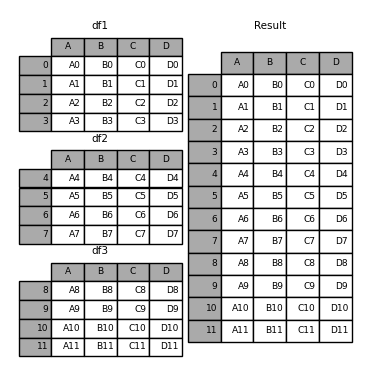

**Note:** This example assumes that your column names are the same. If your column names are different while concatenating along rows (axis 0), then by default the columns will also be added, and `NaN` values will be filled in as applicable.

What if you wanted to perform a concatenation along columns instead? First, take a look at a visual representation of this operation:

![concat_col.png](./images/concat_col.png)

In [52]:
df4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
    },
    index=[2, 3, 6, 7],
)
pd.concat([df1, df4], axis=1)

,0,1,2,B,D,F
0,NaN,3.0,5.0,NaN,NaN,NaN
1,-42.6,NaN,-8.2,NaN,NaN,NaN
2,-5.0,1.6,4.0,B2,D2,F2
3,NaN,NaN,NaN,B3,D3,F3
6,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,B7,D7,F7


![merging_concat_axis1.png](./images/merging_concat_axis1.png)

**Note:** It is worth noting that `concat()` (and therefore `append()`) makes a full copy of the data, and that constantly reusing this function can create a significant performance hit. If you need to use the operation over several datasets, use a list comprehension.

    frames = [ process_your_file(f) for f in files ]
    result = pd.concat(frames)

### How to handle the other axes?
When gluing together multiple DataFrames, you have a choice of how to handle the other axes (other than the one being concatenated). This can be done in the following two ways:
- Take the union of them all, `join='outer'`. This is the default option as it results in zero information loss.
- Take the intersection, `join='inner'`.

The `pandas.concat` function (in the main pandas namespace) does all of
the heavy lifting of performing concatenation operations along an axis while
performing optional set logic (union or intersection) of the indexes (if any) on
the other axes. if any" because there is only a single possible
axis of concatenation for Series.

In [53]:
df4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
    },
    index=[2, 3, 6, 7],
)


pd.concat([df1, df4], axis=1)

,0,1,2,B,D,F
0,NaN,3.0,5.0,NaN,NaN,NaN
1,-42.6,NaN,-8.2,NaN,NaN,NaN
2,-5.0,1.6,4.0,B2,D2,F2
3,NaN,NaN,NaN,B3,D3,F3
6,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,B7,D7,F7


![merging_concat_axis1.png](./images/merging_concat_axis1.png)

In [57]:
pd.concat([df1, df4], axis=1, join="inner")

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


![merging_concat_axis1_inner.png](./images/merging_concat_axis1_inner.png)

Lastly, suppose we just wanted to reuse the *exact index* from the original DataFrame:

In [59]:
pd.concat([df1, df4.reindex(df1.index)], axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
